# Task 1: Data Preprocessing

In [1]:
#Importing the necessary Python libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the CSV file
df=pd.read_csv(r'C:\Users\arj05\OneDrive\Desktop\Assignment\sample_dataset.csv')
# Print the first 5 records of the given dataset.
df.head()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


In [3]:
#Using the shape method will show us the dimensions of the given dataset.
df.shape

(1000, 10)

###### Performing Exploratory Data Analysis (EDA).

<Axes: >

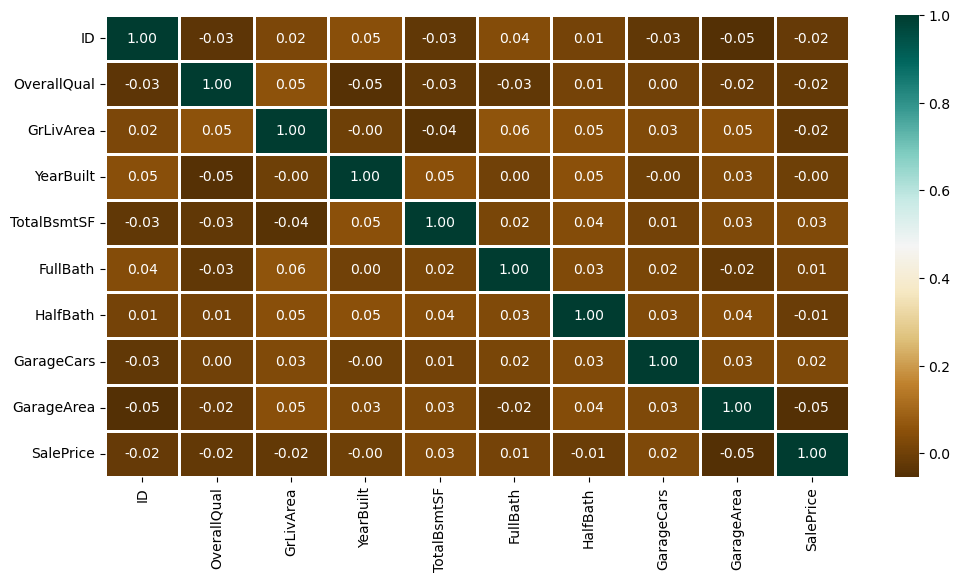

In [4]:
#Performing a correlation heatmap between the dependent feature and independent features.
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

In [5]:
#In a given dataset, the 'ID' column is not important and is irrelevant for model training. 
#Therefore, we can drop that column before training."
df.drop('ID',axis=1,inplace=True)
df.head()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,5,629,2022,702,1,0,3,627,457528
1,2,2402,1972,251,1,1,3,705,78691
2,7,1547,1968,1224,3,0,1,282,316056
3,1,666,1937,2890,4,1,3,39,213285
4,9,2946,1985,768,2,1,4,848,304717


In [6]:
#Check for features that have any null values in the new dataframe.
df.isnull().sum()

OverallQual    0
GrLivArea      0
YearBuilt      0
TotalBsmtSF    0
FullBath       0
HalfBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

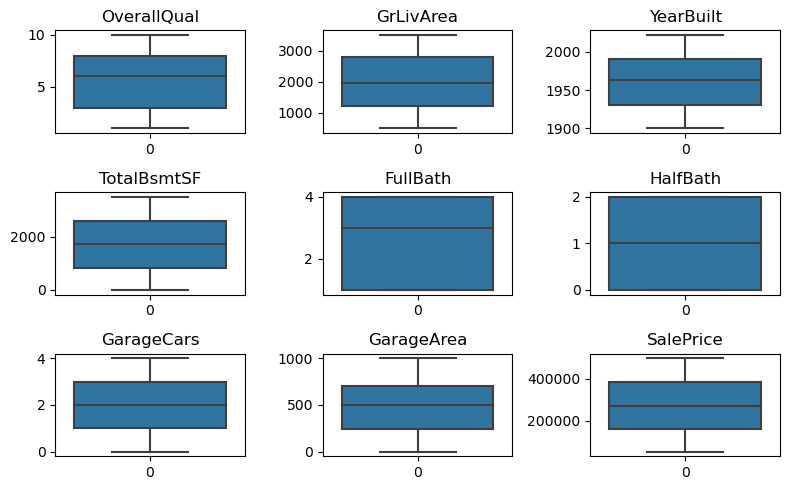

In [7]:
##Checking for any outlier data points in our dataset.    
def plot_boxplots(df):
    fig, axs = plt.subplots(3, 3, figsize=(8, 5))
    for i, col in enumerate(df.columns):
        sns.boxplot(df[col], ax=axs[i//3, i%3])
        axs[i//3, i%3].set_title(col)  # Set subplot title as column name
    plt.tight_layout()
    plt.show()

plot_boxplots(df)

We do not find any outliers in the data from the above graph.

In [8]:
#Defining X (dependent variables) and Y (independent variable). 
X = df.drop(['SalePrice'], axis=1)
Y = df[['SalePrice']]

In [9]:
#Split the training set into a training set and a validation set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (800, 8)
y_train Shape:  (800, 1)
X_test Shape:  (200, 8)
y_test Shape:  (200, 1)


# Task 2: Regression

In [11]:
# Create a dictionary containing various regression model algorithms.
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}

results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape= mean_absolute_percentage_error(y_test, y_pred)
    results.append({'Model': model_name,'RMSE':rmse,'MSE': mse,'MAE': mae,'MAPE': mape, })

results_df = pd.DataFrame(results)
sorted_results_df = results_df.sort_values(by='RMSE', ascending=True)
print(sorted_results_df)    

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training DecisionTreeRegressor...
Training RandomForestRegressor...
Training GradientBoostingRegressor...
                       Model           RMSE           MSE            MAE  \
1           Ridge Regression  131264.754707  1.723044e+10  112283.531187   
2           Lasso Regression  131265.161134  1.723054e+10  112283.956232   
0          Linear Regression  131265.333224  1.723059e+10  112284.068704   
5  GradientBoostingRegressor  135478.505821  1.835443e+10  114985.862865   
4      RandomForestRegressor  136721.025997  1.869264e+10  116553.827300   
3      DecisionTreeRegressor  183652.780312  3.372834e+10  145723.985000   

       MAPE  
1  0.620562  
2  0.620564  
0  0.620565  
5  0.626373  
4  0.631942  
3  0.741746  


By validating the metrics table of the different models above, we conclude that **Ridge Regression** has the minimum RMSE value and the minimum Mean Absolute Percentage Error value.

In [12]:
#Finalize the Ridge Regression model for making predictions.
Ridge_Regression= Ridge()
Ridge_Regression.fit(X_train, y_train)
rr_y_pred = Ridge_Regression.predict(X_test)
mape= mean_absolute_percentage_error(y_test, rr_y_pred)
mae = mean_absolute_error(y_test, rr_y_pred)
mse = mean_squared_error(y_test, rr_y_pred)
rmse = np.sqrt(mse)
print('Root_Mean_Squared_Error: ',rmse)
print('Mean_Squared_Error: ',mse)
print('Mean_Absolute_Error: ',mae)
print('Mean_Absolute_Percentage_Error: ',mape)

Root_Mean_Squared_Error:  131264.75470691585
Mean_Squared_Error:  17230435828.266785
Mean_Absolute_Error:  112283.53118743435
Mean_Absolute_Percentage_Error:  0.6205622806950875


# Save the model

In [13]:
import pickle

#save model
pickle.dump(Ridge_Regression,open(r'C:\Users\arj05\OneDrive\Desktop\Assignment\house_price.pickle','wb'))

#load the model
house_price_model = pickle.load(open(r'C:\Users\arj05\OneDrive\Desktop\Assignment//house_price.pickle','rb'))

#predict the model
rr_y_pred = Ridge_Regression.predict(X_test)

In [14]:
Ridge_Regression.predict([[6,3437,1954,1410,2,0,3,935]])

array([[251703.09482851]])